In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import date

In [26]:
df_o=pd.read_csv('dataset.csv')
df=df_o.copy()

In [27]:
df.shape

(2240, 29)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
len(df.ID.unique())

2240

- No duplicates 


In [30]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Amount of missing Value seems real low so better just fill it with mean values

In [31]:
im=df.Income.mean()
df.fillna(im,inplace=True)

<AxesSubplot:>

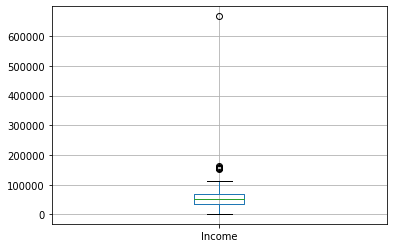

In [32]:
df.boxplot('Income')

- seems like there are some outliers |

In [33]:
df['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [34]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [35]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [36]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [37]:
df.Year_Birth

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [38]:
df.Kidhome.value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [39]:
df.Teenhome.value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [40]:
df['Age']=df.Year_Birth.apply(lambda x:date.today().year-x)


In [41]:
df.drop('Year_Birth',axis=1,inplace=True)

In [42]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,65
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,68
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,57
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,38
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,41


In [43]:
df['Dt_Customer']=pd.to_datetime(df.Dt_Customer,)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_600\2346279551.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']=pd.to_datetime(df.Dt_Customer,)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_600\2346279551.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']=pd.to_datetime(df.Dt_Customer,)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_600\2346279551.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']=pd.to_datetime(df.Dt_Customer,)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_600\2346279551.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']=pd.to_datetime(df.Dt_Customer,)


In [44]:
df['Cus_Tyear_with_company']=df.Dt_Customer.apply(lambda x:date.today().year-x.year)
    

In [45]:
df.drop(['Dt_Customer'],axis=1,inplace=True)

In [46]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cus_Tyear_with_company
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,65,10
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,68,8
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,57,9
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,38,8
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,41,8


- Year_Birth and Dt_Customer has been conerted into simple amount of years

In [47]:
colm=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
mean_of_product=df[colm].mean()
mean_of_product

MntWines            303.935714
MntFruits            26.302232
MntMeatProducts     166.950000
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntGoldProds         44.021875
dtype: float64

<BarContainer object of 6 artists>

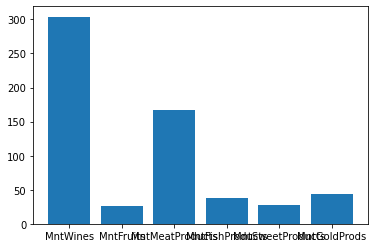

In [48]:
plt.bar(colm,mean_of_product)

- most revenue seems to be coming from wine prodcts


In [49]:
df['Total_spent_by_each_Cus']=df.MntWines+df.MntFruits+df.MntMeatProducts+df.MntFishProducts+df.MntSweetProducts+df.MntGoldProds

In [50]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cus_Tyear_with_company,Total_spent_by_each_Cus
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,65,10,1617
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,68,8,27
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,57,9,776
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,38,8,53
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,41,8,422


In [51]:
df['Total_accepted_cmp']=df.AcceptedCmp3+df.AcceptedCmp4+df.AcceptedCmp5+df.AcceptedCmp2+df.AcceptedCmp1+df.Response
df.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1','Response'],axis=1,inplace=True)

In [52]:
df['Total_spent_by_each_Cus'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_spent_by_each_Cus, dtype: float64

- it seems like  75percentage of custmores has spent less than 1000dollar in total and less than 25 percentage has spent    less than 68dollar

In [53]:
df['Total_accepted_cmp'].value_counts()/len(df)*100

0    72.812500
1    16.517857
2     6.339286
3     2.276786
4     1.607143
5     0.446429
Name: Total_accepted_cmp, dtype: float64

- more than 72% has not accepted offer in any campaign

In [54]:
grp1=df.groupby(by='Education').mean()
df1=grp1[colm]
df1

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,198.182266,28.955665,141.256158,47.482759,34.251232,46.399015
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
Graduation,284.268855,30.774623,179.488909,43.149956,31.367347,50.849157
Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297
PhD,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700


Text(0, 0.5, 'Mean_sale')

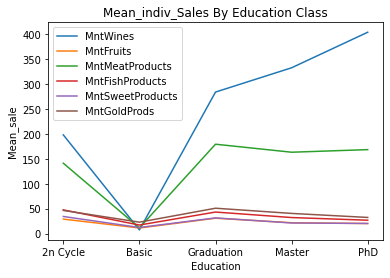

In [55]:
plt.plot(df1)
plt.legend(colm)
plt.title('Mean_indiv_Sales By Education Class')
plt.xlabel('Education')
plt.ylabel('Mean_sale')

<AxesSubplot:xlabel='Education'>

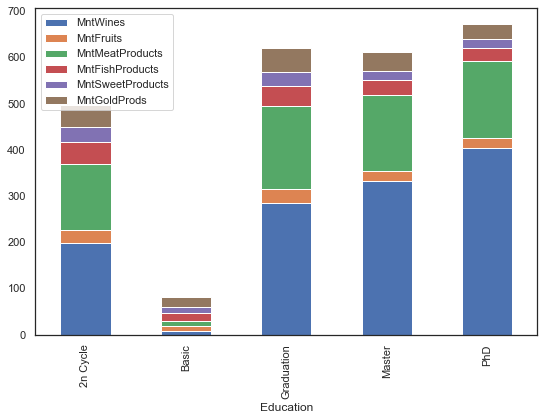

In [56]:
sns.set(style='white')
df1.plot(kind='bar', stacked=True,figsize=(9,6))

- By Graph we can say That Wine and Meatproducts has least  sale for people with basic education 
- while Other products shows similar amount of sales in all classes with mean of below 50$

In [57]:
grp2=df.groupby('Marital_Status').mean()
df2=grp2[colm]
df2

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000
Divorced,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
Single,288.331250,26.835417,182.108333,38.216667,27.262500,43.729167
Together,306.825862,25.350000,168.103448,38.991379,26.122414,42.994828
Widow,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234
YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000


Text(0, 0.5, 'Mean_sale')

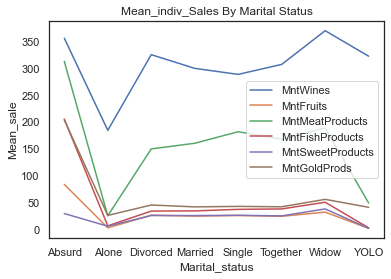

In [58]:
plt.plot(df2)
plt.legend(df2.columns)
plt.title('Mean_indiv_Sales By Marital Status')
plt.xlabel('Marital_status')
plt.ylabel('Mean_sale')

<AxesSubplot:xlabel='Marital_Status'>

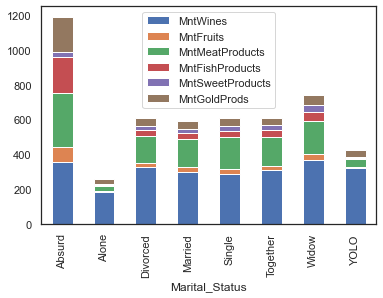

In [59]:
sns.set(style='white')
df2.plot(kind='bar', stacked=True,)

- it looks like most absurd marital_status people are into goldproducts,Fish Products
- Wine seems to be less bought by Alone catogery

In [60]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age',
       'Cus_Tyear_with_company', 'Total_spent_by_each_Cus',
       'Total_accepted_cmp'],
      dtype='object')

In [61]:
grp3=df.groupby(by='Kidhome').mean()
df3=grp3[colm]
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,451.173241,39.392885,253.996133,56.162413,40.498840,60.037123
1,104.403782,8.517241,48.862069,12.311457,8.932147,22.408231
2,74.791667,6.770833,33.833333,7.729167,4.708333,17.416667


<AxesSubplot:xlabel='Kidhome'>

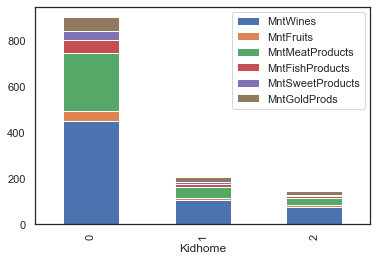

In [62]:
sns.set(style='white')
df3.plot(kind='bar', stacked=True,)

- As we can see people with Kids has Least amount of spending in any category compared to one without kids

In [63]:
grp4=df.groupby(by='Teenhome').mean()
df4=grp4[colm]
df4

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,304.822971,33.310017,227.120035,48.658031,33.631261,45.256477
1,300.009709,18.866990,101.432039,25.697087,20.233010,42.587379
2,361.942308,17.519231,124.769231,23.903846,16.076923,44.942308


<AxesSubplot:xlabel='Teenhome'>

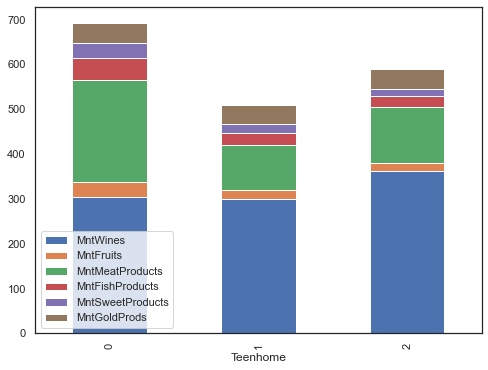

In [64]:
sns.set(style='white')
df4.plot(kind='bar', stacked=True,figsize=(8,6))

- similary people with teenagers spent less than people without teenager but there isnt significantly high diffferes
- Meat products seems to have double amount spent by no teenagers than one with teenagers

In [65]:
colm2=['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df5=df[colm2].sum()

<AxesSubplot:>

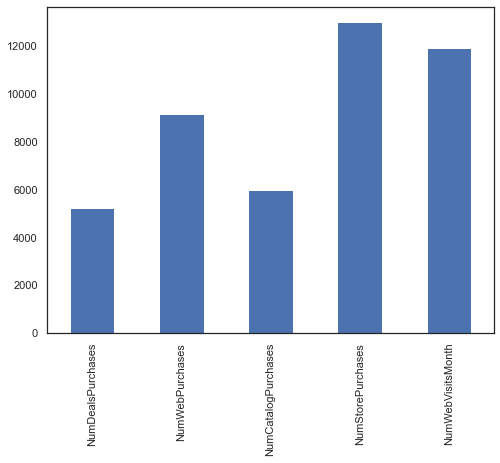

In [66]:
df5.plot(kind='bar',figsize=(8,6))

- Most customer seem to be Buying from stores 

In [67]:
print(df['Recency'].mean(),df['Recency'].mode())

49.109375 0    56
Name: Recency, dtype: int64


- it seems like most people buy back again on average of 2months

In [68]:
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

- there isnt much data in Complains so better drop it too

In [69]:
df.drop('Complain',axis=1,inplace=True)

In [70]:
df.drop('ID',axis=1,inplace=True)

In [71]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Cus_Tyear_with_company,Total_spent_by_each_Cus,Total_accepted_cmp
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,65,10,1617,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,68,8,27,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,57,9,776,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,38,8,53,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,41,8,422,0


lets label encode education and martial_status

In [72]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
lenc.fit(df.Marital_Status)
df['Marital_Status']=lenc.transform(df.Marital_Status)

In [73]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Cus_Tyear_with_company,Total_spent_by_each_Cus,Total_accepted_cmp
0,Graduation,4,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,65,10,1617,1
1,Graduation,4,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,68,8,27,0
2,Graduation,5,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,57,9,776,0
3,Graduation,5,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,38,8,53,0
4,PhD,3,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,41,8,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,3,61223.0,0,1,46,709,43,182,42,...,247,2,9,3,4,5,55,9,1341,0
2236,PhD,5,64014.0,2,1,56,406,0,30,0,...,8,7,8,2,5,7,76,8,444,1
2237,Graduation,2,56981.0,0,0,91,908,48,217,32,...,24,1,2,3,13,6,41,8,1241,1
2238,Master,5,69245.0,0,1,8,428,30,214,80,...,61,2,6,5,10,3,66,8,843,0


In [74]:
from sklearn.preprocessing import OrdinalEncoder
education = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
ordi = OrdinalEncoder(categories=([education]))
ordi.fit(df[['Education']])
df['Education'] = ordi.transform(df[['Education']])

In [75]:
df.head()
df_c=df.copy()
df_c.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Cus_Tyear_with_company,Total_spent_by_each_Cus,Total_accepted_cmp
0,1.0,4,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,65,10,1617,1
1,1.0,4,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,68,8,27,0
2,1.0,5,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,57,9,776,0
3,1.0,5,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,38,8,53,0
4,4.0,3,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,41,8,422,0


Now lets scale down all variables

In [76]:
from sklearn.preprocessing import StandardScaler
df_c.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Cus_Tyear_with_company', 'Total_spent_by_each_Cus',
       'Total_accepted_cmp'],
      dtype='object')

In [92]:
colm3=['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Cus_Tyear_with_company', 'Total_spent_by_each_Cus', 'Total_accepted_cmp']
sc=StandardScaler()
s_d=np.array(df_c[colm3]).reshape(-1,19)
sc.fit(s_d)
df_c[colm3]=sc.transform(df_c[colm3])


C:\Users\dhanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [94]:
df_c.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Cus_Tyear_with_company,Total_spent_by_each_Cus,Total_accepted_cmp
count,2240.000000,2240.000000,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,...,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2240.000000,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,1.973214,3.729911,2.854859e-17,-8.088768e-17,-3.172066e-18,-3.172066e-18,1.903239e-17,-1.744636e-17,2.537653e-17,1.110223e-17,...,-1.268826e-17,6.344132e-18,-2.220446e-17,-3.172066e-18,-2.775558e-18,0.000000,3.251367e-17,-3.251367e-17,2.220446e-17,-6.344132e-17
std,1.248204,1.076277,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,...,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,0.000000,0.000000,-2.018090e+00,-8.252176e-01,-9.298944e-01,-1.696001e+00,-9.031668e-01,-6.614492e-01,-7.398135e-01,-6.870680e-01,...,-8.440457e-01,-1.203537e+00,-1.470368e+00,-9.108985e-01,-1.781466e+00,-2.191381,-2.269702e+00,-1.420036e+00,-9.978133e-01,-5.019124e-01
25%,1.000000,3.000000,-6.674801e-01,-8.252176e-01,-9.298944e-01,-8.671566e-01,-8.325919e-01,-6.363012e-01,-6.689119e-01,-6.321399e-01,...,-6.714858e-01,-6.858866e-01,-7.504503e-01,-9.108985e-01,-8.584551e-01,-0.954831,-6.839101e-01,4.109430e-02,-8.919365e-01,-5.019124e-01
50%,1.000000,4.000000,-2.020403e-02,-8.252176e-01,-9.298944e-01,-3.777284e-03,-3.875991e-01,-4.602650e-01,-4.429132e-01,-4.673554e-01,...,-3.838859e-01,-1.682363e-01,-3.053224e-02,-2.265407e-01,-2.431145e-01,0.281720,-9.967091e-02,4.109430e-02,-3.484355e-01,-5.019124e-01
75%,3.000000,5.000000,6.408743e-01,1.032559e+00,9.069340e-01,8.596020e-01,5.952483e-01,1.684356e-01,2.882592e-01,2.284015e-01,...,2.296605e-01,3.494139e-01,6.893858e-01,4.578170e-01,6.798964e-01,0.693904,8.184192e-01,4.109430e-02,7.302623e-01,6.212482e-01
max,4.000000,7.000000,2.454513e+01,2.890335e+00,2.743762e+00,1.722981e+00,3.533390e+00,4.343008e+00,6.904261e+00,4.055064e+00,...,6.096698e+00,6.561217e+00,8.248526e+00,8.670110e+00,2.218248e+00,6.052291,6.326960e+00,1.502225e+00,3.187435e+00,5.113891e+00


In [95]:
from sklearn.cluster import KMeans as Km

In [108]:
wcss = []
for i in range(1,5):
    kmeans = Km(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df_c)
    wcss.append(kmeans.inertia_)

In [109]:
wcss

[48641.98883928574, 36006.19290001934, 32546.07153871059, 31067.913863654867]

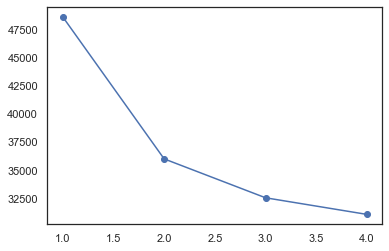

In [112]:
plt.plot(range(1,5),wcss,marker='o')


- its seems like number of cluster 2 is best 

In [113]:
kmeans = Km(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(df_c)
df['Segments']=kmeans.predict(df_c)

In [114]:
grp5=df.groupby('Segments').mean()
grp5

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Cus_Tyear_with_company,Total_spent_by_each_Cus,Total_accepted_cmp
Segments,,,,,,,,,,,,,,,,,,,,,
0,1.938106,3.722595,39031.689054,0.694258,0.555556,48.699478,99.410887,6.644295,36.932886,9.787472,...,22.178225,2.526473,2.945563,0.879940,3.934377,6.381805,51.987323,8.922446,181.674124,0.204325
1,2.025584,3.740823,71960.342615,0.071190,0.432703,49.720801,609.016685,55.625139,360.890990,78.901001,...,76.605117,2.024472,5.784205,5.320356,8.558398,3.727475,54.994438,9.045606,1238.446051,0.808676


<AxesSubplot:xlabel='Income', ylabel='Total_spent_by_each_Cus'>

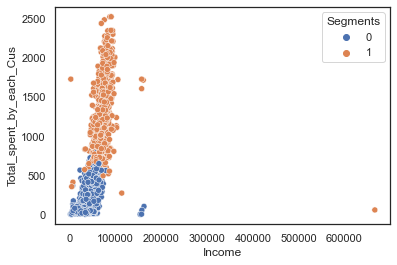

In [122]:
sns.scatterplot(x=df.Income,y=df.Total_spent_by_each_Cus,hue=df['Segments'])

- It Looks like segment 0 have less income,more kids ,buys less products,and accepted offers in less campaign

In [121]:
df['Segments'].value_counts()

0    1341
1     899
Name: Segments, dtype: int64